<a href="https://colab.research.google.com/github/BIGmatty363/CODE-SCHOOL-PROJECT-/blob/main/Copy_of_Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/dsollberger/quartoblog/master/posts/office_sentiment/office_sentiment.csv"
df = pd.read_csv(url)
df.head()

,index,season,episode,episode_name,director,writer,character,text,text_w_direction,imdb_rating,total_votes,air_date,sentimentAnalysis_score,sentimentr_score,syuzhet_score
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...,7.6,3706,2005-03-24,0.285714,0.134552,2.15
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So...",7.6,3706,2005-03-24,0.000000,0.461880,0.00
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...,7.6,3706,2005-03-24,0.428571,0.603738,0.50
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah.",7.6,3706,2005-03-24,0.000000,0.244949,0.00
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done.",7.6,3706,2005-03-24,0.400000,0.000000,1.60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55130 entries, 0 to 55129
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    55130 non-null  int64  
 1   season                   55130 non-null  int64  
 2   episode                  55130 non-null  int64  
 3   episode_name             55130 non-null  object 
 4   director                 55130 non-null  object 
 5   writer                   55130 non-null  object 
 6   character                55130 non-null  object 
 7   text                     54753 non-null  object 
 8   text_w_direction         55125 non-null  object 
 9   imdb_rating              55130 non-null  float64
 10  total_votes              55130 non-null  int64  
 11  air_date                 55130 non-null  object 
 12  sentimentAnalysis_score  51718 non-null  float64
 13  sentimentr_score         55130 non-null  float64
 14  syuzhet_score         

In [ ]:
df.columns

Index(['index', 'season', 'episode', 'episode_name', 'director', 'writer',
       'character', 'text', 'text_w_direction', 'imdb_rating', 'total_votes',
       'air_date', 'sentimentAnalysis_score', 'sentimentr_score',
       'syuzhet_score'],
      dtype='object')

In [ ]:
df.groupby('episode')['text'].count().sort_values(ascending=False)

,text
episode,
3,2604
1,2600
7,2526
5,2492
4,2487
10,2476
16,2336
13,2326
6,2324


In [ ]:
df.isnull().sum()

,0
index,0
season,0
episode,0
episode_name,0
director,0
writer,0
character,0
text,377
text_w_direction,5
imdb_rating,0


In [ ]:
df = df.dropna(subset=['text'])

In [ ]:
df ['sentimentAnalysis_score'] =  df['sentimentAnalysis_score'].fillna(0)

/tmp/ipython-input-2708596344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['sentimentAnalysis_score'] =  df['sentimentAnalysis_score'].fillna(0)


In [ ]:
df['air_date'] = pd.to_datetime(df['air_date'])

/tmp/ipython-input-277026921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['air_date'] = pd.to_datetime(df['air_date'])


In [ ]:
df.groupby('season')['imdb_rating'].mean()

,imdb_rating
season,
1,7.995494
2,8.461241
3,8.620589
4,8.651552
5,8.523982
6,8.244412
7,8.339646
8,7.669323
9,8.088420


In [ ]:
df.groupby(['season','episode'])['imdb_rating'].mean()

season  episode
1       1          7.6
        2          8.3
        3          7.9
        4          8.1
        5          8.4
                  ... 
9       19         8.0
        20         8.0
        21         8.9
        22         9.3
        24         9.7
Name: imdb_rating, Length: 186, dtype: float64

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
df.groupby('season')['director'].unique()

,director
season,
1,"[Ken Kwapis, Ken Whittingham, Bryan Gordon, Gr..."
2,"[Greg Daniels, Ken Kwapis, Paul Feig, Greg Dan..."
3,"[Ken Kwapis, Ken Whittingham, Greg Daniels, Ro..."
4,"[Greg Daniels, Craig Zisk, Ken Whittingham, Pa..."
5,"[Paul Feig, Jeffrey Blitz, Greg Daniels, Jenni..."
6,"[Paul Lieberstein, Randall Einhorn, Jennifer C..."
7,"[Jeffrey Blitz, John Scott, Paul Lieberstein, ..."
8,"[B.J. Novak, Charles McDougall, John Krasinski..."
9,"[Greg Daniels, Matt Sohn, David Rogers, Bryan ..."


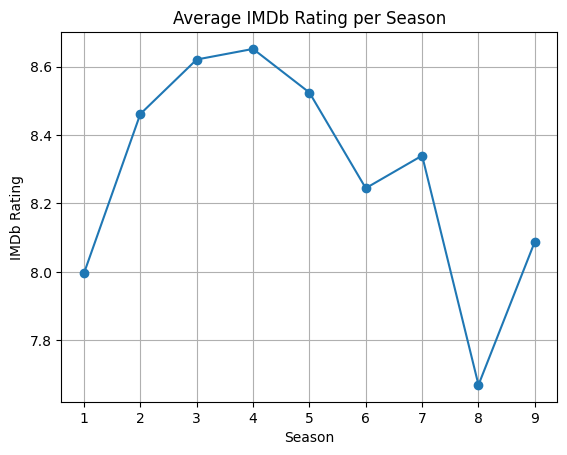

In [ ]:
import matplotlib.pyplot as plt

season_rating = df.groupby('season')['imdb_rating'].mean()

season_rating.plot(kind='line', marker='o')

plt.title("Average IMDb Rating per Season")

plt.xlabel("Season")

plt.ylabel("IMDb Rating")

plt.grid(True)

plt.show()

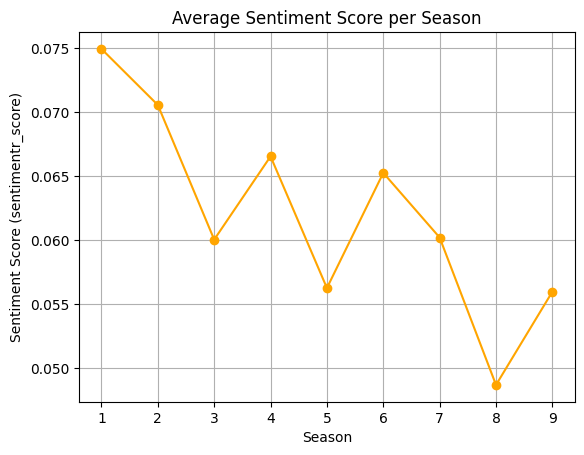

In [ ]:
season_sentiment = df.groupby('season')['sentimentr_score'].mean()

season_sentiment.plot(kind='line', marker='o', color='orange')

plt.title("Average Sentiment Score per Season")

plt.xlabel("Season")

plt.ylabel("Sentiment Score (sentimentr_score)")

plt.grid(True)

plt.show()






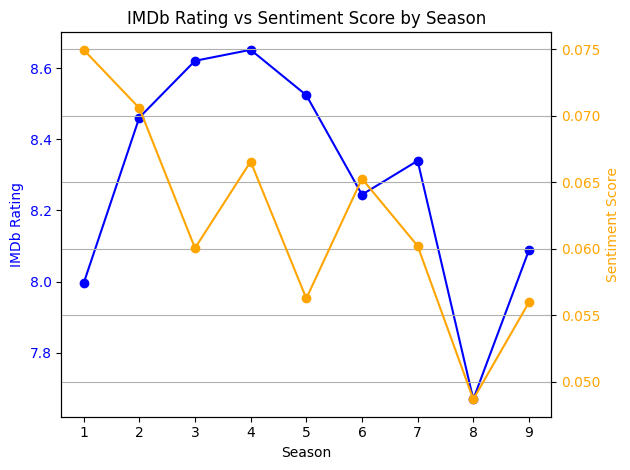

In [ ]:
fig, ax1 = plt.subplots()

# Plot IMDb Rating
ax1.plot(season_rating, label='IMDb Rating', marker='o', color='blue')
ax1.set_xlabel("Season")
ax1.set_ylabel("IMDb Rating", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis for sentiment
ax2 = ax1.twinx()
ax2.plot(season_sentiment, label='Sentiment Score', marker='o', color='orange')
ax2.set_ylabel("Sentiment Score", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title("IMDb Rating vs Sentiment Score by Season")
fig.tight_layout()
plt.grid(True)
plt.show()

 Which season of the offce have the higest and lowest ratings and why ?

In [ ]:
# Combine both series into one DataFrame

combined = pd.DataFrame({

    'IMDb_Rating': season_rating,

    'Sentiment_Score': season_sentiment

})

# Check correlation

combined.corr()

,IMDb_Rating,Sentiment_Score
IMDb_Rating,1.000000,0.311456
Sentiment_Score,0.311456,1.000000


In [ ]:
df.groupby('season')['imdb_rating'].mean()

,imdb_rating
season,
1,7.995494
2,8.461241
3,8.620589
4,8.651552
5,8.523982
6,8.244412
7,8.339646
8,7.669323
9,8.088420


In [ ]:
df.groupby(['season', 'episode'])['imdb_rating'].mean()

season  episode
1       1          7.6
        2          8.3
        3          7.9
        4          8.1
        5          8.4
        6          7.8
2       1          8.7
        2          8.2
        3          8.4
        4          8.4
        5          8.2
        6          8.2
        7          8.6
        8          8.2
        9          8.4
        10         8.8
        11         8.6
        12         9.0
        13         8.3
        14         7.9
        15         8.2
        16         8.3
        17         8.4
        18         8.3
        19         8.1
        20         8.4
        21         8.7
        22         9.3
3       1          8.9
        2          8.2
        3          8.5
        4          8.0
        5          8.2
        6          8.0
        7          8.5
        8          8.7
        9          8.2
        10         8.7
        12         8.5
        13         8.6
        14         8.8
        15         8.2
        16         8.3
        17         8.8
        18         8.5
        19         8.9
        20         8.8
        21         8.7
        22         8.8
        23         9.1
        24         9.3
4       1          8.8
        3          8.4
        5          8.5
        7          8.7
        9          8.8
        10         8.5
        11         8.3
        12         8.7
        13         9.3
        14         8.1
        15         8.7
        16         8.4
        17         7.9
        18         9.3
5       1          8.8
        3          8.3
        4          8.1
        5          8.1
        6          8.1
        7          8.5
        8          8.2
        9          8.6
        10         8.7
        11         8.4
        12         8.7
        13         8.1
        14         9.6
        16         8.2
        17         8.2
        18         8.1
        19         8.7
        20         8.3
        21         8.4
        22         8.3
        23         8.7
        24         8.7
        25         9.1
        26         8.3
        27         8.7
        28         8.9
6       1          8.7
        2          8.2
        3          8.0
        4          9.3
        6          7.7
        7          8.6
        8          8.2
        9          8.2
        10         8.6
        11         8.2
        12         8.3
        13         8.5
        14         6.8
        15         7.8
        16         8.1
        17         8.4
        19         7.8
        20         7.9
        21         8.6
        22         7.9
        23         8.0
        24         8.2
        25         7.9
        26         8.0
7       1          8.4
        2          8.3
        3          8.2
        4          7.9
        5          7.8
        6          8.2
        7          7.5
        8          7.9
        9          7.8
        10         8.2
        11         8.9
        13         8.3
        14         7.7
        15         8.5
        16         8.4
        17         9.3
        18         7.5
        19         9.2
        20         7.8
        21         8.9
        22         9.7
        23         7.7
        24         8.7
        25         8.8
8       1          8.2
        2          8.2
        3          7.3
        4          8.1
        5          7.6
        6          7.8
        7          7.7
        8          7.0
        9          7.7
        10         8.0
        11         7.9
        12         8.0
        13         7.5
        14         7.8
        15         7.9
        16         8.1
        17         7.8
        18         7.8
        19         6.7
        20         7.2
        21         7.1
        22         7.1
        23         7.7
        24         7.8
9       1          7.7
        2          7.2
        3          7.5
        4          7.9
        5          7.1
        6          7.8
        7          7.7
        8          7.8
        9          8.4
        10         7.7
     

In [ ]:
df.groupby('season')['director'].unique()

,director
season,
1,"[Ken Kwapis, Ken Whittingham, Bryan Gordon, Gr..."
2,"[Greg Daniels, Ken Kwapis, Paul Feig, Greg Dan..."
3,"[Ken Kwapis, Ken Whittingham, Greg Daniels, Ro..."
4,"[Greg Daniels, Craig Zisk, Ken Whittingham, Pa..."
5,"[Paul Feig, Jeffrey Blitz, Greg Daniels, Jenni..."
6,"[Paul Lieberstein, Randall Einhorn, Jennifer C..."
7,"[Jeffrey Blitz, John Scott, Paul Lieberstein, ..."
8,"[B.J. Novak, Charles McDougall, John Krasinski..."
9,"[Greg Daniels, Matt Sohn, David Rogers, Bryan ..."


In [ ]:
df[['season', 'director']].drop_duplicates().sort_values('season')

,season,director
0,1,Ken Kwapis
432,1,Ken Whittingham
676,1,Bryan Gordon
919,1,Greg Daniels
1149,1,Amy Heckerling
1495,2,Greg Daniels
1751,2,Ken Kwapis
2034,2,Paul Feig
3171,2,Greg Daneils
3973,2,Charles McDougall


In [ ]:
df['rating_group'] = df['imdb_rating'].apply(lambda x: 'High' if x >= 8.5 else 'Low')

# Keeping only needed columns and drop nulls

subset = df[['sentimentr_score', 'rating_group']].dropna()

high_sentiment = subset[subset['rating_group'] == 'High']['sentimentr_score']

low_sentiment = subset[subset['rating_group'] == 'Low']['sentimentr_score']

from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(high_sentiment, low_sentiment, equal_var=False)

print("T-statistic:", t_stat)

print("P-value:", p_val)

T-statistic: 1.6998737009166132
P-value: 0.08916229313665534


In [ ]:
# Create a binary label: High (1) if rating >= 8.5, else Low (0)

df['rating_label'] = (df['imdb_rating'] >= 8.5).astype(int)

# Keep only the needed columns and drop nulls

subset = df[['sentimentr_score', 'rating_label']].dropna()

from sklearn.model_selection import train_test_split

X = subset[['sentimentr_score']]

y = subset['rating_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6355583964934709
Confusion Matrix:
 [[6960    0]
 [3991    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      6960
           1       0.00      0.00      0.00      3991

    accuracy                           0.64     10951
   macro avg       0.32      0.50      0.39     10951
weighted avg       0.40      0.64      0.49     10951



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


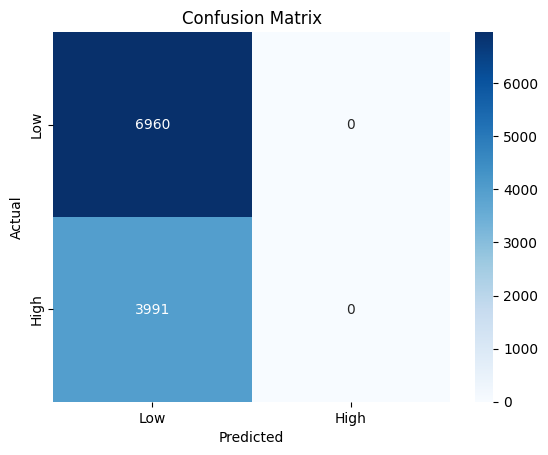

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix')

plt.show()